http://www.manythings.org/anki/

Seq2Seq모델
  - 입력언어는 단어의 개수를 알수 있음

    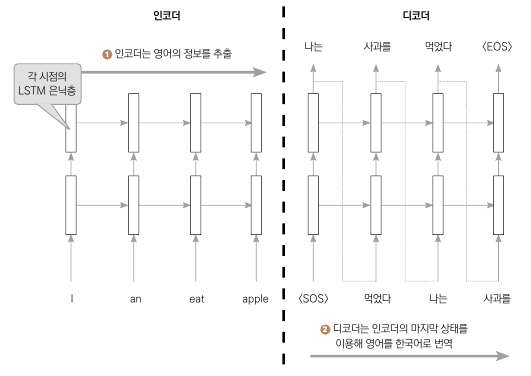

어텐션 메커니즘

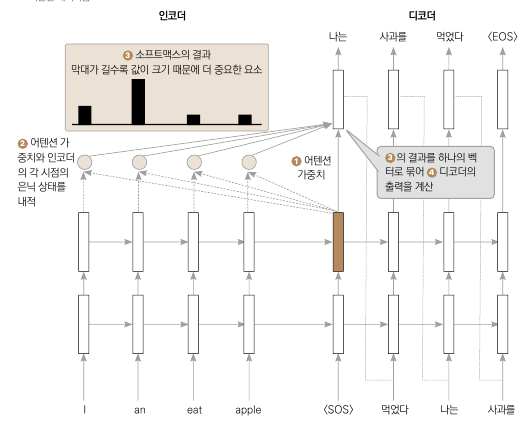

GRU
  - LSTM을 간략화한 모델로 셀 상태와 은닉상태를 통합한 모델

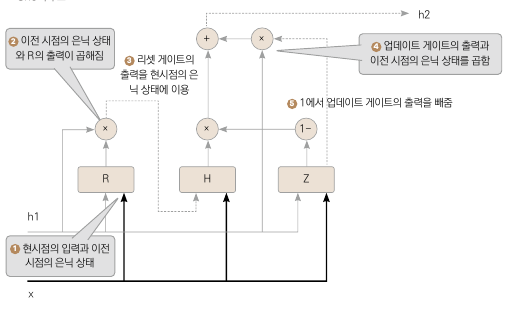

In [1]:
!unzip /content/kor-eng.zip

Archive:  /content/kor-eng.zip
  inflating: _about.txt              
  inflating: kor.txt                 


In [2]:
import string

lines = []
with open('/content/kor.txt') as f:
  for line in f:
    temp = "\t".join(line.split('\t')[:2])
    temp = "".join(v for v in temp if v not in string.punctuation)
    lines.append(temp)


temp_bow = {}
for line in lines:
  temp = line.split('\t')[0].split()
  for w in temp:
    if w not in temp_bow:
      temp_bow[w] = len(temp_bow.keys())

temp_bow


{'Go': 0,
 'Hi': 1,
 'Run': 2,
 'Who': 3,
 'Wow': 4,
 'Duck': 5,
 'Fire': 6,
 'Help': 7,
 'Hide': 8,
 'Jump': 9,
 'Stay': 10,
 'Wait': 11,
 'Begin': 12,
 'Hello': 13,
 'I': 14,
 'see': 15,
 'try': 16,
 'won': 17,
 'Oh': 18,
 'no': 19,
 'Relax': 20,
 'Shoot': 21,
 'Smile': 22,
 'Sorry': 23,
 'Attack': 24,
 'Freeze': 25,
 'Get': 26,
 'up': 27,
 'Got': 28,
 'it': 29,
 'He': 30,
 'ran': 31,
 'Hug': 32,
 'me': 33,
 'know': 34,
 'lost': 35,
 'quit': 36,
 'work': 37,
 'Listen': 38,
 'No': 39,
 'way': 40,
 'Thanks': 41,
 'We': 42,
 'Why': 43,
 'Awesome': 44,
 'Be': 45,
 'calm': 46,
 'fair': 47,
 'Beat': 48,
 'Call': 49,
 'us': 50,
 'Come': 51,
 'in': 52,
 'on': 53,
 'out': 54,
 'away': 55,
 'Goodbye': 56,
 'came': 57,
 'runs': 58,
 'Hit': 59,
 'Tom': 60,
 'Hold': 61,
 'agree': 62,
 'Im': 63,
 'sad': 64,
 'Join': 65,
 'Kiss': 66,
 'Me': 67,
 'too': 68,
 'Open': 69,
 'Perfect': 70,
 'Show': 71,
 'Shut': 72,
 'Skip': 73,
 'Stop': 74,
 'Tell': 75,
 'Text': 76,
 'Wake': 77,
 'Wash': 78,
 'Welcome':

In [3]:
import numpy as np
import torch

from torch.utils.data.dataset import Dataset

# 문장들로 부터 BOW 를 만드는 함수
def get_BOW(corpus):
  BOW = {"<SOS>":0, '<EOS>':1} # 문장의 시작과 끝
  #  단어를 이용해서 BOW 생성
  for line in corpus:
    for word in line.split():
      if word not in BOW:
        BOW[word] = len(BOW.keys())
  return BOW

In [4]:
class Eng2Kor(Dataset):
  def __init__(self, pth2txt = '/content/kor.txt'):
    self.eng_corpus = []
    self.kor_corpus = []
    with open('/content/kor.txt') as f:
      for line in f:
        temp = "\t".join(line.split('\t')[:2])
        temp = "".join(v for v in temp if v not in string.punctuation)
        engtext = temp.split('\t')[0]
        kortext = temp.split('\t')[1]

        #길이가 10이하인 문장만 사용
        if len(engtext.split()) <=10 and len(kortext.split()) <=10:
          self.eng_corpus.append(engtext)
          self.kor_corpus.append(kortext)

    self.engBOW = get_BOW(self.eng_corpus)
    self.korBOW = get_BOW(self.kor_corpus)
  def gen_seq(self,line): #입력받은 문장 마지막에 eos를 추가하는 함수
    # line = " ".join(line)
    seq = line.split()
    seq.append('<EOS>')
    return seq
  def __len__(self):
    return len(self.eng_corpus)
  def __getitem__(self, index):  # 데이터와 정답을 반환 함수
    # 문자열을 숫자로 표현
    data = np.array([self.engBOW[txt] for txt in self.gen_seq(self.eng_corpus[index])])
    label = np.array([self.korBOW[txt] for txt in self.gen_seq(self.kor_corpus[index])])
    return data, label



In [5]:
dataset = Eng2Kor()
dataset.engBOW

{'<SOS>': 0,
 '<EOS>': 1,
 'Go': 2,
 'Hi': 3,
 'Run': 4,
 'Who': 5,
 'Wow': 6,
 'Duck': 7,
 'Fire': 8,
 'Help': 9,
 'Hide': 10,
 'Jump': 11,
 'Stay': 12,
 'Wait': 13,
 'Begin': 14,
 'Hello': 15,
 'I': 16,
 'see': 17,
 'try': 18,
 'won': 19,
 'Oh': 20,
 'no': 21,
 'Relax': 22,
 'Shoot': 23,
 'Smile': 24,
 'Sorry': 25,
 'Attack': 26,
 'Freeze': 27,
 'Get': 28,
 'up': 29,
 'Got': 30,
 'it': 31,
 'He': 32,
 'ran': 33,
 'Hug': 34,
 'me': 35,
 'know': 36,
 'lost': 37,
 'quit': 38,
 'work': 39,
 'Listen': 40,
 'No': 41,
 'way': 42,
 'Thanks': 43,
 'We': 44,
 'Why': 45,
 'Awesome': 46,
 'Be': 47,
 'calm': 48,
 'fair': 49,
 'Beat': 50,
 'Call': 51,
 'us': 52,
 'Come': 53,
 'in': 54,
 'on': 55,
 'out': 56,
 'away': 57,
 'Goodbye': 58,
 'came': 59,
 'runs': 60,
 'Hit': 61,
 'Tom': 62,
 'Hold': 63,
 'agree': 64,
 'Im': 65,
 'sad': 66,
 'Join': 67,
 'Kiss': 68,
 'Me': 69,
 'too': 70,
 'Open': 71,
 'Perfect': 72,
 'Show': 73,
 'Shut': 74,
 'Skip': 75,
 'Stop': 76,
 'Tell': 77,
 'Text': 78,
 'Wake': 

In [6]:
def loader(dataset):
  for i in range(len(dataset)):
    data,label = dataset[i]
    yield torch.tensor(data), torch.tensor(label)  # yield는 return 하고 똑같지만 반복문에서 사용하면 효과가 좋음

In [7]:
dataset = Eng2Kor()
dataloader = loader(dataset)

인코더 정의

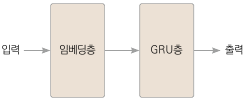

In [8]:
import torch.nn as nn

class Encorder(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(Encorder,self).__init__()
    self.embedding = nn.Embedding(input_size,hidden_size)
    self.gru = nn.GRU(hidden_size, hidden_size)
  def forward(self, x, h):  # 배치 차원하고 시계열 차원
    x = self.embedding(x).view(1,1,-1)
    output,hidden =  self.gru(x,h)
    return output, hidden

디코더

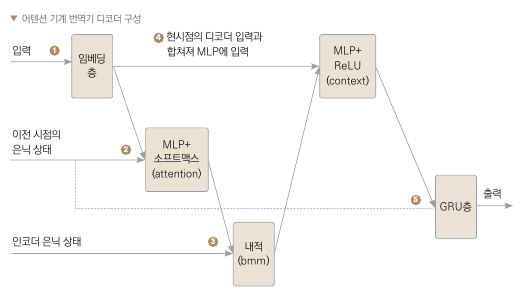

In [9]:
class Decoder(nn.Module):
   def __init__(self, hidden_size, output_size, dropout_p=0.1, max_length=11):
       super(Decoder, self).__init__()

       # 임베딩층 정의
       self.embedding = nn.Embedding(output_size, hidden_size)

       # 어텐션 가중치를 계산하기 위한 MLP층
       self.attention = nn.Linear(hidden_size * 2, max_length)

       #특징 추출을 위한 MLP층
       self.context = nn.Linear(hidden_size * 2, hidden_size)

       # 과적합을 피하기 위한 드롭아웃 층
       self.dropout = nn.Dropout(dropout_p)

       # GRU층
       self.gru = nn.GRU(hidden_size, hidden_size)

       # 단어 분류를 위한 MLP층
       self.out = nn.Linear(hidden_size, output_size)

       # 활성화 함수
       self.relu = nn.ReLU()
       self.softmax = nn.LogSoftmax(dim=1)

   def forward(self, x, h, encoder_outputs):
       # 1입력을 밀집 표현으로
       x = self.embedding(x).view(1, 1, -1)
       x = self.dropout(x)

       # 2 어텐션 가중치 계산
       attn_weights = self.softmax(
           self.attention(torch.cat((x[0], h[0]), -1)))

       # 3 어텐션 가중치와 인코더의 출력을 내적
       attn_applied = torch.bmm(attn_weights.unsqueeze(0),
                                encoder_outputs.unsqueeze(0))

       # 4 인코더 각 시점의 중요도와 민집표현을 합쳐
       # MLP층으로 특징 추출
       output = torch.cat((x[0], attn_applied[0]), 1)
       output = self.context(output).unsqueeze(0)
       output = self.relu(output)

       # 5 GRU층으로 입력
       output, hidden = self.gru(output, h)

       # 6 예측된 단어 출력
       output = self.out(output[0])

       return output

학습

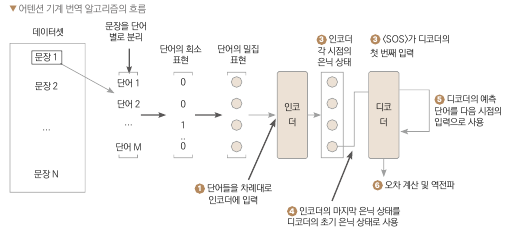

In [10]:
import random
import tqdm
from torch.optim.adam import Adam

In [11]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
dataset = Eng2Kor()

encoder = Encorder(input_size=len(dataset.engBOW), hidden_size=64).to(device)
decoder = Decoder(64,len(dataset.korBOW)).to(device)

encoder_optim = Adam(encoder.parameters(), lr = 1e-4)
decoder_optim = Adam(decoder.parameters(), lr = 1e-4)

학습

In [13]:
for epoch in range(10):
   iterator = tqdm.tqdm(loader(dataset), total=len(dataset))
   total_loss = 0

   for data, label in iterator:
       data = torch.tensor(data, dtype=torch.long).to(device)
       label = torch.tensor(label, dtype=torch.long).to(device)

       # 인코더의 초기 은닉 상태
       encoder_hidden = torch.zeros(1, 1, 64).to(device)
       # 인코더의 모든 시점의 출력을 저장하는 변수
       encoder_outputs = torch.zeros(11, 64).to(device)

       encoder_optim.zero_grad()
       decoder_optim.zero_grad()

       loss = 0
       for ei in range(len(data)):
           # 1 한 단어씩 인코더에 넣어줌
           encoder_output, encoder_hidden = encoder(
               data[ei], encoder_hidden)
           # 2 인코더의 은닉 상태를 저장
           encoder_outputs[ei] = encoder_output[0, 0]

       decoder_input = torch.tensor([[0]]).to(device)

       # 3 인코더의 마지막 은닉 상태를 디코더의 초기 은닉 상태로 저장
       decoder_hidden = encoder_hidden
       use_teacher_forcing = True if random.random() < 0.5 else False  # 1

       if use_teacher_forcing:
           for di in range(len(label)):
               decoder_output = decoder(
                   decoder_input, decoder_hidden, encoder_outputs)

               # 직접적으로 정답을 다음 시점의 입력으로 넣어줌
               target = torch.tensor(label[di], dtype=torch.long).to(device)
               target = torch.unsqueeze(target, dim=0).to(device)
               loss += nn.CrossEntropyLoss()(decoder_output, target)
               decoder_input = target
       else:
           for di in range(len(label)):
               decoder_output = decoder(
                   decoder_input, decoder_hidden, encoder_outputs)

               # 1 가장 높은 확률을 갖는 단어의 인덱스가 topi
               topv, topi = decoder_output.topk(1)
               decoder_input = topi.squeeze().detach()

               # 디코더의 예측값을 다음 시점의 입력으로 넣어줌
               target = torch.tensor(label[di], dtype=torch.long).to(device)
               target = torch.unsqueeze(target, dim=0).to(device)
               loss += nn.CrossEntropyLoss()(decoder_output, target)

               if decoder_input.item() == 1:  # <EOS> 토큰을 만나면 중지
                   break
       # 전체 손실 계산
       total_loss += loss.item()/len(dataset)
       iterator.set_description(f"epoch:{epoch+1} loss:{total_loss}")
       loss.backward()

       encoder_optim.step()
       decoder_optim.step()

torch.save(encoder.state_dict(), "attn_enc.pth")
torch.save(decoder.state_dict(), "attn_dec.pth")

  0%|          | 0/5608 [00:00<?, ?it/s]<ipython-input-13-5701b6178739>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.long).to(device)
<ipython-input-13-5701b6178739>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  label = torch.tensor(label, dtype=torch.long).to(device)
<ipython-input-13-5701b6178739>:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  target = torch.tensor(label[di], dtype=torch.long).to(device)
epoch:1 loss:0.0018334516274946052:   0%|          | 0/5608 [00:00<?, ?it/s]<ipython-i

In [14]:
encoder.load_state_dict(torch.load('/content/attn_enc.pth',map_location=device))
decoder.load_state_dict(torch.load('/content/attn_dec.pth',map_location=device))

<All keys matched successfully>

In [36]:
idx = random.randint(0,len(dataset))
input_sentence = dataset.eng_corpus[idx]
pred_sentence = ""
data,label = dataset[idx]

# 2 인코더의 초기 은닉상태 정의
encoder_hidden = torch.zeros(1,1,64).to(device)
encoder_outputs = torch.zeros(11,64).to(device)

In [37]:
# 예측값을 얻기 위해 인코더의 동작
data = torch.tensor(data,dtype=torch.long).to(device)
for ei in range(len(data)):
  # 1. 한 단어씩 인코더에 넣어줌
  encoder_output, encoder_hidden = encoder(
      data[ei], encoder_hidden
  )
  # 2. 인코더 출력 저장
  encoder_outputs[ei] = encoder_output[0,0]

# 3 .디코더의 초기 입력
# 0은 <SOS>토큰
decoder_input = torch.tensor([[0]]).to(device)

# 4. 인코더의 마직막 은닉 상태를 디코더의 초기 은닉 상태로
decoder_hidden = encoder_hidden

# 디코더 동작
for di in range(11):
  # 1. 가장 높은 확률을갖는 단어의 요소
  decoder_output = decoder(
      decoder_input,decoder_hidden,encoder_outputs
  )
  topv,topi = decoder_output.topk(1)
  decoder_input = topi.squeeze().detach()

  # 2. <EOS> 토큰을 만나면 중지
  if decoder_input.item() == 1:
    break

  # 3. 가장 높은 단어를 문자열에 추가
  pred_sentence += list(dataset.korBOW.keys())[decoder_input] + " "

print(input_sentence)
print(pred_sentence)

Human beings are social creatures
너 


(array([ 176,  177,  135,  551,  565,  104,  130,  204,  135, 1338,    1]),
 array([7015, 2625, 7016,  627, 7017,    1]))